In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle as w
import explore as e
import model as m

from scipy.stats import ttest_1samp
from sklearn.metrics import mean_squared_error
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

In [2]:
df = w.wrangle_new_york()

In [3]:
train, val, test = w.split_new_york(df)

In [4]:
train.shape, val.shape, test.shape

((1015, 2), (60, 2), (12, 2))

In [5]:
X_train, y_train, X_val, y_val, X_test, y_test = w.X_y_modeling_split(train, val, test, 'avg_temp')
#something is wrong in this function because target variable is dropping from y sets
#fixed it, needed double brackets instead of single brackets

In [6]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1015, 1), (1015, 1), (60, 1), (60, 1), (12, 1), (12, 1))

In [7]:
X_train

,avg_temp_uncertainty
date,
1923-02-01,0.370
1923-03-01,0.359
1923-04-01,0.295
1923-05-01,0.234
1923-06-01,0.224
...,...
2007-04-01,0.154
2007-05-01,0.183
2007-06-01,0.318


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

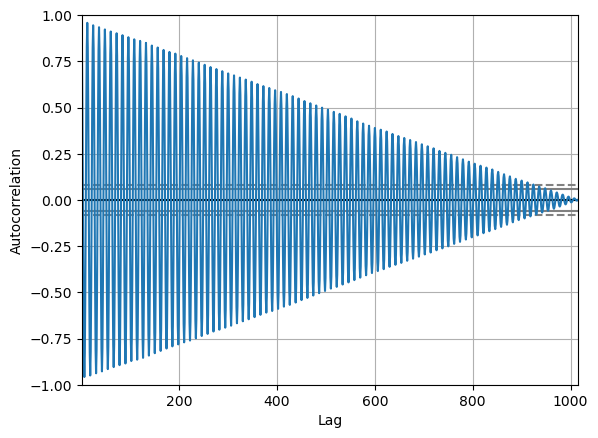

In [8]:
pd.plotting.autocorrelation_plot(train.avg_temp.resample('M').mean())
#suspicious


,avg_temp,avg_temp_uncertainty
date,,
1923-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
1933-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
1943-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
1953-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
1963-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
1973-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
1983-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
1993-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2003-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"


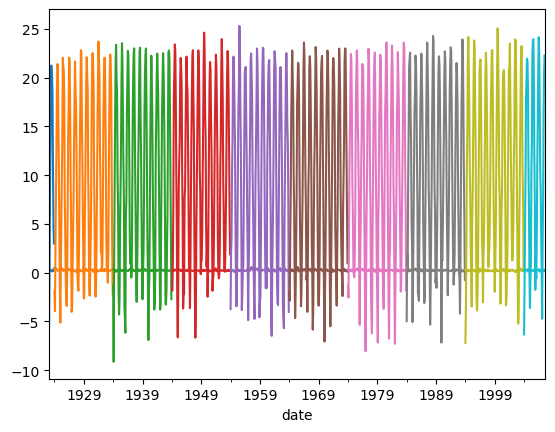

In [9]:
train.resample('10Y').plot()

Modeling

In [16]:
# compute a 365 day rolling average, 
# use the most recent/last 365 day period value to predict forward. 

period = 365

temp_uncertainty = round(train['avg_temp_uncertainty'].rolling(period).mean().iloc[-1], 4)

# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'avg_temp': [temp_uncertainty]}, index = val.index)
yhat_df.head()


,avg_temp
date,
2007-09-01,0.2399
2007-10-01,0.2399
2007-11-01,0.2399
2007-12-01,0.2399
2008-01-01,0.2399


In [17]:
y_val.head()

,avg_temp
date,
2007-09-01,19.000
2007-10-01,15.222
2007-11-01,4.831
2007-12-01,-0.094
2008-01-01,-0.573


In [18]:
yhat_df.head()

,avg_temp
date,
2007-09-01,0.2399
2007-10-01,0.2399
2007-11-01,0.2399
2007-12-01,0.2399
2008-01-01,0.2399


In [19]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(y_val[target_var], yhat_df[target_var])), 0)
    return rmse


In [20]:
evaluate('avg_temp')

14.0

In [21]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(val[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


avg_temp -- RMSE: 14


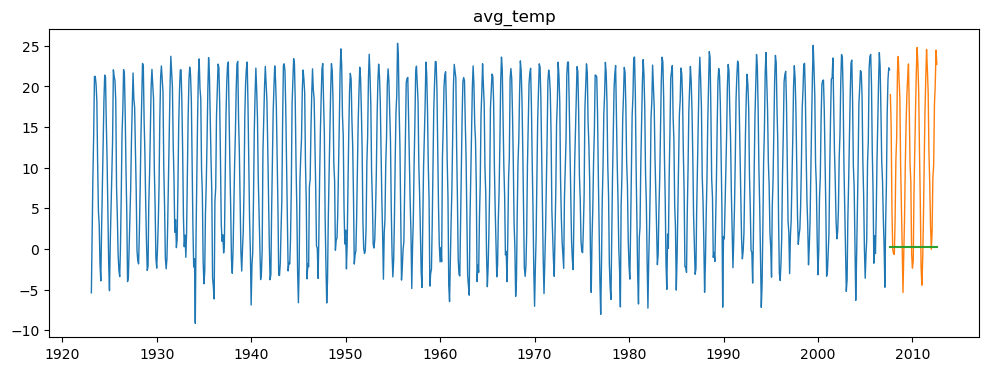

In [22]:
plot_and_eval('avg_temp')